<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Extracting Stock Data Using a Web Scraping</h1>


Not all stock data is available via the API in this assignment; you will use web-scraping to obtain financial data. You will be quizzed on your results.  
 You will extract and share historical data from a web page using the BeautifulSoup library.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1. Extracting data using BeautifulSoup
   
    <ul> 
    <li> Download the web page Using Requests Library </li>
    <li> Parse HTML on a web page using BeautifulSoup </li>
    <li> Extract data and duild a data frame </li>

    </ul>

2. Extracting data using pandas
3. Exercise
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [14]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib
!pip install lxml
!pip install plotly
!pip install yfinance
!pip install beautifulsoup4
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 76.7 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 6.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138891 sha256=3e1135b284d53c2a48909a91b43161be0a2e9f6dd093312268f8b84c4a22845d
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/1c/09/7e/9f659fde248ecdc1722a142c1d744271aad3914a0afc191058
Successfully built peewee


### Extracting Tesla Stock Data Using yfinance 

In [17]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
#import matplotlib.pyplot as plt

In [18]:
tesla_stock = yf.Ticker('TSLA')

tesla_data = tesla_stock.history(period="max")
tesla_data.reset_index(inplace=True)

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Use Webscraping to Extract Tesla Revenue Data

In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [31]:
# Import the requests library
import requests

# URL of the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

html_data = requests.get(url).text

soup = BeautifulSoup(html_data, 'html.parser')
revenue_data = []

for row in soup.find_all('table')[0].find_all('tr')[1:]:
    col = row.find_all('td')
    date = col[0].text.strip()
    revenue = col[1].text.strip().replace('$', '').replace(',', '')
    revenue_data.append({"Date": date, "Revenue": revenue})

tesla_revenue = pd.DataFrame(revenue_data)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.tail()


,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Use yfinance to Extract Stock Data

<!-- 
 


 ## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    |       Change Description              |
| ----------------- | ------- | ------------- | ------------------------------------- |
|  02-05-2023       |   1.3   | Akansha yadav | Updated Lab content under maintenance |
|  2021-06-09       | 1.2     | Lakshmi Holla |   Added URL in question 3             |
|  2020-11-10       | 1.1     | Malika Singla |   Deleted the Optional part           |
|  2020-08-27       | 1.0     | Malika Singla |   Added lab to GitLab                 |

<hr>



<p>
--!>


In [32]:
gme_stock = yf.Ticker('GME')

gme_data = gme_stock.history(period="max")

gme_data.reset_index(inplace=True)

gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


## Use Webscraping to Extract GME Revenue Data

In [34]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

html_data = requests.get(url).text

soup = BeautifulSoup(html_data, 'html.parser')

gme_revenue_data = []

for row in soup.find_all('table')[1].find_all('tr')[1:]:
    col = row.find_all('td')
    date = col[0].text.strip()  # Extract and clean the date
    revenue = col[1].text.strip().replace('$', '').replace(',', '') 
    gme_revenue_data.append({"Date": date, "Revenue": revenue})

gme_revenue = pd.DataFrame(gme_revenue_data)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [36]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 80.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 83.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 10.1 MB/s eta 0:00:00


## Plot Tesla Stock Graph

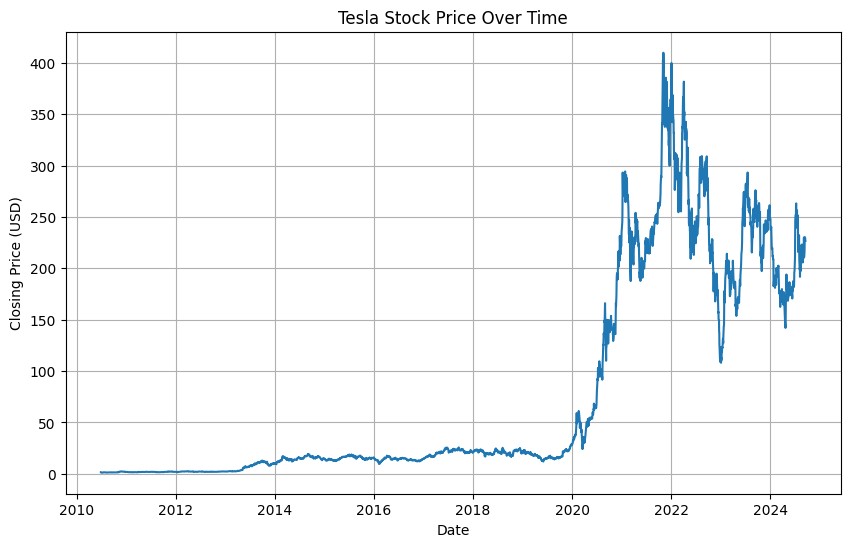

In [37]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10,6))
    plt.plot(data['Date'], data['Close'], label="Close Price")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.title(title)
    plt.grid(True)
    plt.show()

make_graph(tesla_data, "Tesla Stock Price Over Time")


## Plot GameStop Stock Graph

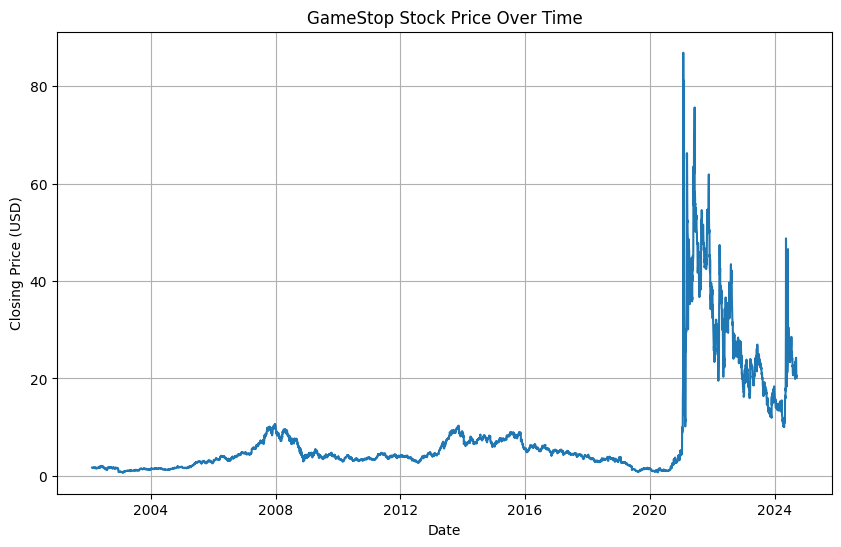

In [38]:
def make_graph(data, title):
    plt.figure(figsize=(10,6))
    plt.plot(data['Date'], data['Close'], label="Close Price")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.title(title)
    plt.grid(True)
    plt.show()

make_graph(gme_data, "GameStop Stock Price Over Time")
